# $$f(x) = x^2$$

# $$f'(x) = 2x$$

# $$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

In [1]:
def f(x):
    return x**2

def df(x):
    return 2*x

def ndiff(f, x, h=1e-2):
    return (f(x + h) - f(x)) / h

In [2]:
x = 3

fx = f(x)
dfx = df(x)
fndfx = ndiff(f, x, h=1e-4)

fx, dfx, fndfx

(9, 6, 6.000100000012054)

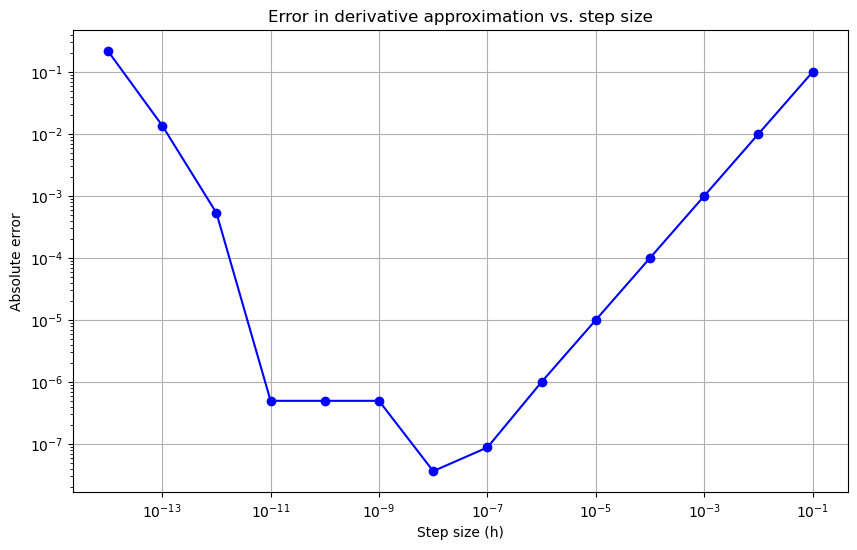

In [3]:
import matplotlib.pyplot as plt

x = 3
dfx = df(x)

hs = [10**-p for p in range(1, 15)]
abs_errors = []

for h in hs:
    ndfx = ndiff(f, x, h)
    abs_errors.append(abs(ndfx - dfx))

abs_errors

plt.figure(figsize=(10, 6))
plt.loglog(hs, abs_errors, 'bo-')
plt.xlabel('Step size (h)')
plt.ylabel('Absolute error')
plt.title('Error in derivative approximation vs. step size')
plt.grid(True)
plt.show()

### Forward difference

### $ \frac{df}{dx} \approx \frac{f(x+h) - f(x)}{h}$

### Backward difference

### $ \frac{df}{dx} \approx \frac{f(x) - f(x-h)}{h}$

### Central difference

### $ \frac{df}{dx} \approx \frac{f(x+h) - f(x-h)}{2h}$

In [4]:
def fdiff(f, x, h=1e-2):
    return (f(x + h) - f(x)) / h


def bdiff(f, x, h=1e-2):
    return (f(x) - f(x - h)) / h


def cdiff(f, x, h=1e-2):
    return (f(x + h) - f(x - h)) / (2 * h)


def plot_errors(f, df, x):
    dfx = df(x)
    hs = [10**-p for p in range(1, 15)]

    f_errors, b_errors, c_errors = [], [], []

    for h in hs:
        f_errors.append(abs(fdiff(f, x, h) - dfx))
        b_errors.append(abs(bdiff(f, x, h) - dfx))
        c_errors.append(abs(cdiff(f, x, h) - dfx))

    plt.figure(figsize=(10, 6))
    plt.loglog(hs, f_errors, 'ro-', label='Forward difference')
    plt.loglog(hs, b_errors, 'go-', label='Backward difference')
    plt.loglog(hs, c_errors, 'bo-', label='Central difference')

    plt.xlabel('Step size (h)')
    plt.ylabel('Absolute error')
    plt.title(f'Error in derivative approximation vs. step size for {f.__name__}')
    plt.grid(True)
    plt.legend()
    plt.show()

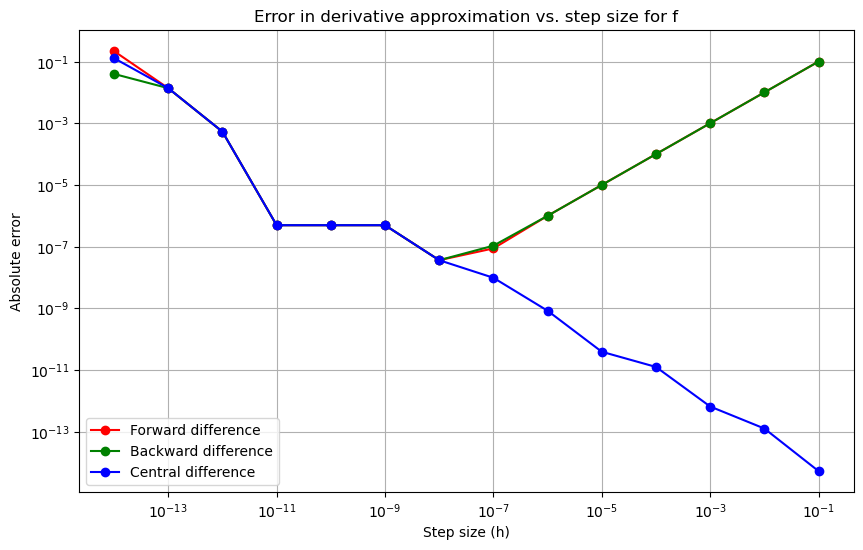

In [5]:
def f(x):
    return x**2

def df(x):
    return 2*x

x = 3
plot_errors(f, df, x)

# $\frac{d}{dx}e^x=e^x$

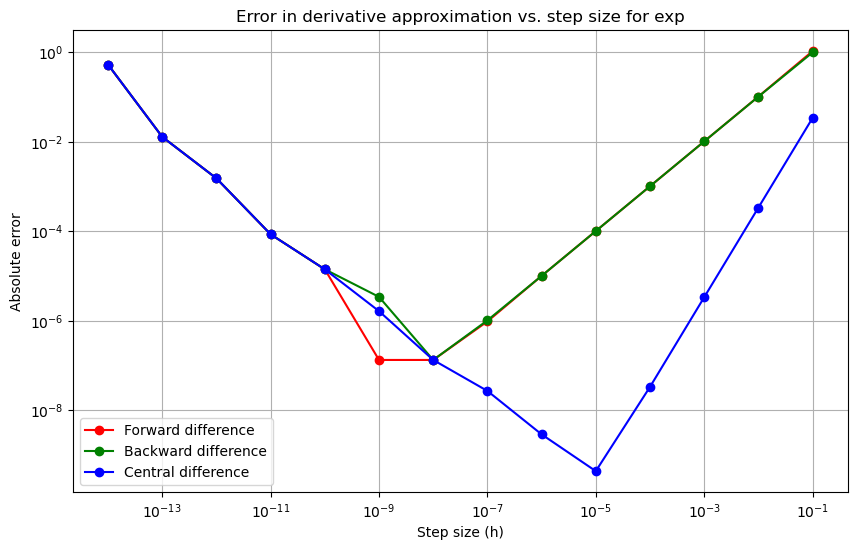

In [6]:
import numpy as np


def exp(x):
    return np.exp(x)


def d_exp(x):
    return np.exp(x)

x = 3
plot_errors(exp, d_exp, x)

# $\frac{d}{dx}sin(x)=cos(x)$

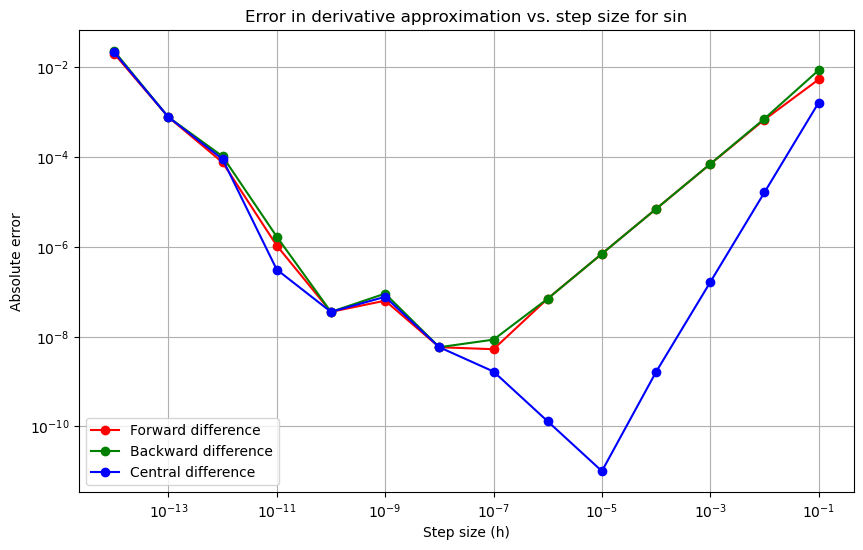

In [7]:
def sin(x):
    return np.sin(x)


def d_sin(x):
    return np.cos(x)


x = 3
plot_errors(sin, d_sin, x)

# $\frac{d}{dx}tanh(x)=1−tanh^2(x)$

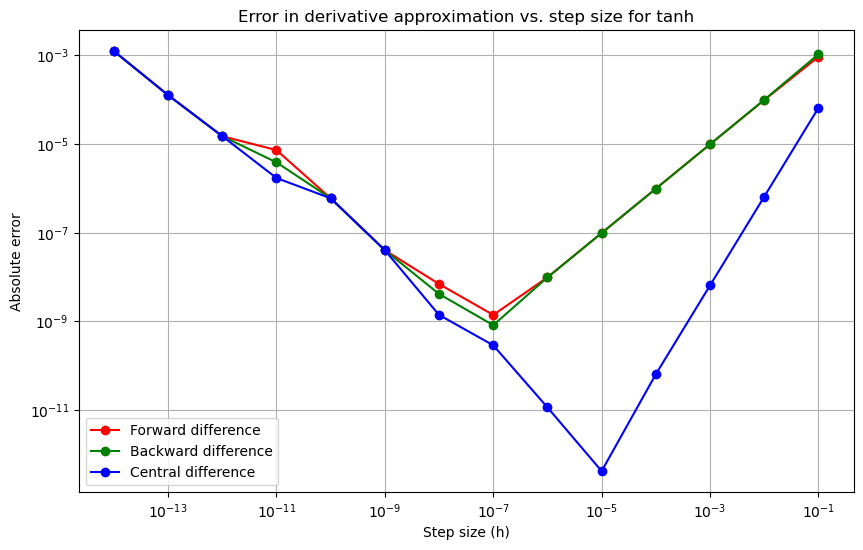

In [8]:
def tanh(x):
    return np.tanh(x)


def d_tanh(x):
    return 1 - np.tanh(x)**2


x = 3
plot_errors(tanh, d_tanh, x)